# Análisis de datos HAR
Este notebook contiene ejercicios resueltos, interpretación adaptada a los datos reales, gráficos adicionales y comentarios explicativos.

## Importar las librerías necesarias y cargar los datos en dataframes

🔹 **Qué hacer:**  
- Importa las librerías básicas necesarias para el análisis de datos 
- Carga los siguientes archivos CSV en diferentes DataFrames:
  - `Phones_accelerometer.csv`
  - `Phones_gyroscope.csv`
  - `Watch_accelerometer.csv`
  - `Watch_gyroscope.csv`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Cargar los datasets

# df_subset_ph_acc = pd.read_csv("data/Filtrados/df_subset_ph_acc.csv")
# df_subset_ph_gyr = pd.read_csv("data/Filtrados/df_subset_ph_gyr.csv")
# df_subset_wat_acc = pd.read_csv("data/Filtrados/df_subset_wat_acc.csv")
# df_subset_wat_gyr = pd.read_csv("data/Filtrados/df_subset_wat_gyr.csv")
df_subset_ph_acc = pd.read_csv(
    "data/heterogeneity+activity+recognition/Activity recognition exp/Activity recognition exp/Phones_accelerometer.csv"
)
df_subset_ph_gyr = pd.read_csv(
    "data/heterogeneity+activity+recognition/Activity recognition exp/Activity recognition exp/Phones_gyroscope.csv"
)
df_subset_wat_acc = pd.read_csv(
    "data/heterogeneity+activity+recognition/Activity recognition exp/Activity recognition exp/Watch_accelerometer.csv"
)
df_subset_wat_gyr = pd.read_csv(
    "data/heterogeneity+activity+recognition/Activity recognition exp/Activity recognition exp/Watch_gyroscope.csv"
)

## Ejercicio 1: Cargar y explorar los datos del acelerómetro de los teléfonos

**Trabajaremos inicialmente con el acelerómetro del teléfono (`df_subset_ph_acc`).**


🔹 **Qué hacer:** 
- Mostrar las primeras 5 filas.
- Hacer un gráfico de barras que muestre la distribucion de muestras por actividad

🔹 **¿Por qué es importante?:** Entender la estructura y el contenido del dataset.

🔹 **Preguntas de reflexión:**
- ¿Todas las columnas parecen relevantes para modelar actividades?
- ¿Hay columnas que parecen ser tiempo o identificadores?

In [2]:
# Solución
df_subset_ph_acc.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [3]:
df_subset_ph_acc = df_subset_ph_acc.where(
    df_subset_ph_acc["Device"] == "nexus4_1"
).dropna()
df_subset_ph_acc.info()

df_subset_ph_gyr = df_subset_ph_gyr.where(
    df_subset_ph_gyr["Device"] == "nexus4_1"
).dropna()

df_subset_wat_acc = df_subset_wat_acc.where(
    df_subset_wat_acc["Device"] == "gear_1"
).dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 2670808 entries, 0 to 11870462
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          float64
 1   Arrival_Time   float64
 2   Creation_Time  float64
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(6), object(4)
memory usage: 224.1+ MB


**Interpretación:**
- Las columnas `Arrival_Time` y `Creation_Time` son claramente tiempos y podrían no ser útiles como input directo.
- `Index` parece ser un identificador.
- `x`, `y`, `z` contienen las aceleraciones, fundamentales para modelar actividades.


**Visualización extra:** Distribución de muestras por actividad.

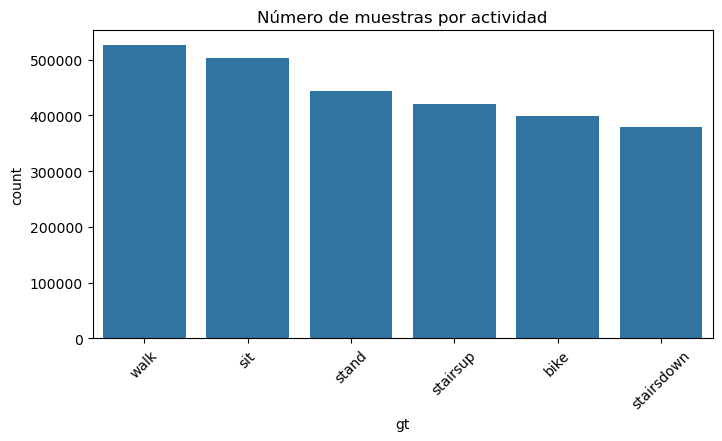

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df_subset_ph_acc, x="gt", order=df_subset_ph_acc["gt"].value_counts().index
)
plt.title("Número de muestras por actividad")
plt.xticks(rotation=45)
plt.show()

**Comentario:**
Observamos que algunas actividades como 'walk' y 'sit' tienen muchas más muestras que otras como 'stairsdown'. Esto puede impactar el balance del dataset.

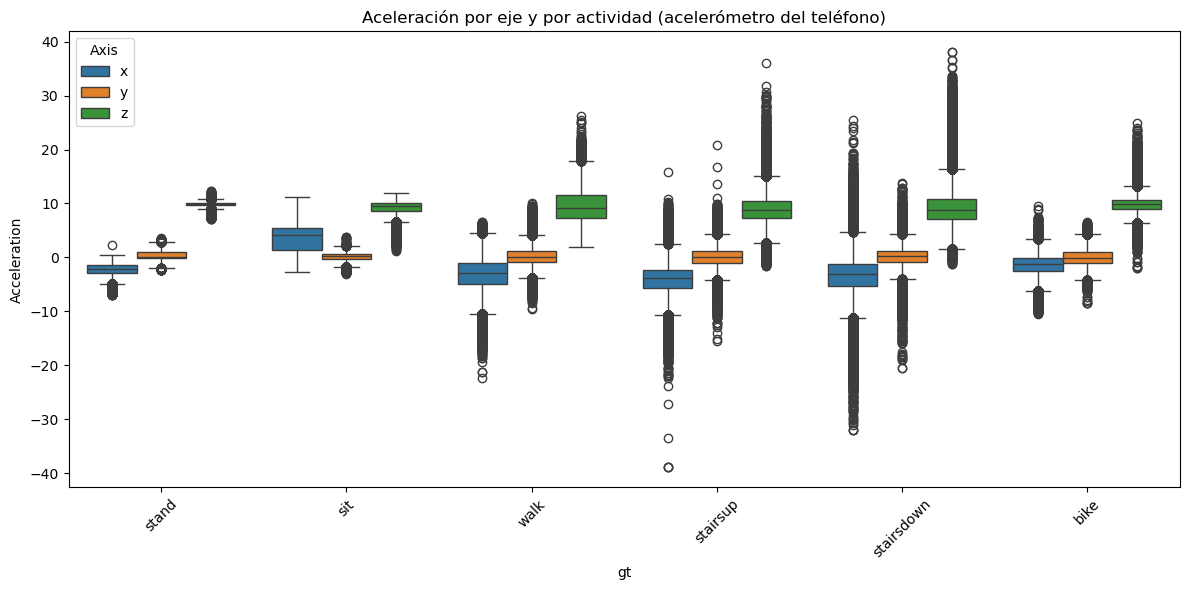

In [5]:
# Transformamos a formato largo
df_melt = df_subset_ph_acc.melt(
    id_vars=["gt"],
    value_vars=["x", "y", "z"],
    var_name="Axis",
    value_name="Acceleration",
)

plt.figure(figsize=(12, 6))
sns.boxplot(x="gt", y="Acceleration", hue="Axis", data=df_melt)
plt.title("Aceleración por eje y por actividad (acelerómetro del teléfono)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

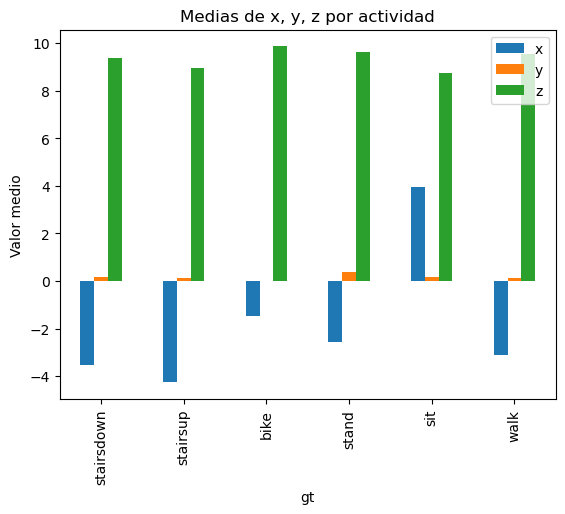

In [6]:
grouped_means = df_subset_ph_acc.groupby("gt")[["x", "y", "z"]].mean()
grouped_means

selected_activities = ["stairsdown", "stairsup", "bike", "stand", "sit", "walk"]
grouped_means.loc[selected_activities].plot(kind="bar")
plt.title("Medias de x, y, z por actividad")
plt.ylabel("Valor medio")
plt.show()

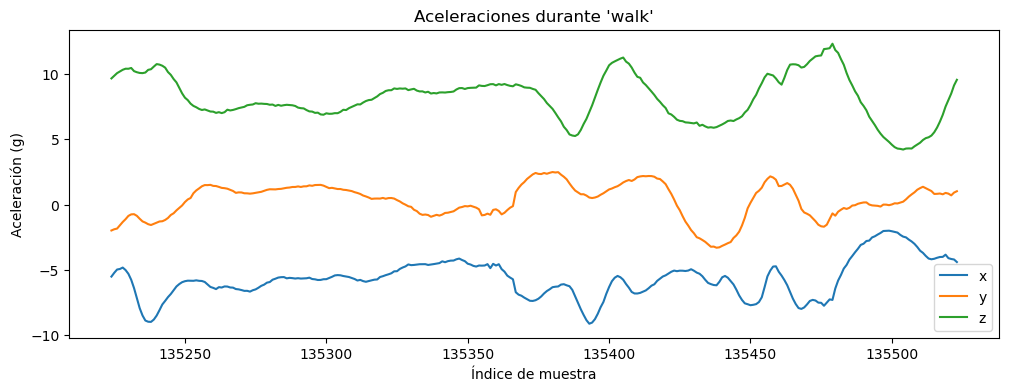

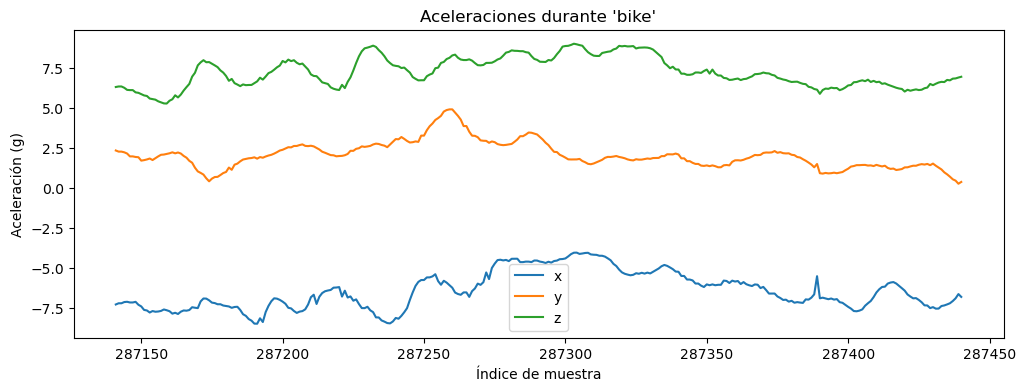

In [7]:
for activity in ["walk", "bike"]:
    df_act = df_subset_ph_acc[df_subset_ph_acc["gt"] == activity].head(300)
    df_act[["x", "y", "z"]].plot(
        title=f"Aceleraciones durante '{activity}'", figsize=(12, 4)
    )
    plt.ylabel("Aceleración (g)")
    plt.xlabel("Índice de muestra")
    plt.show()

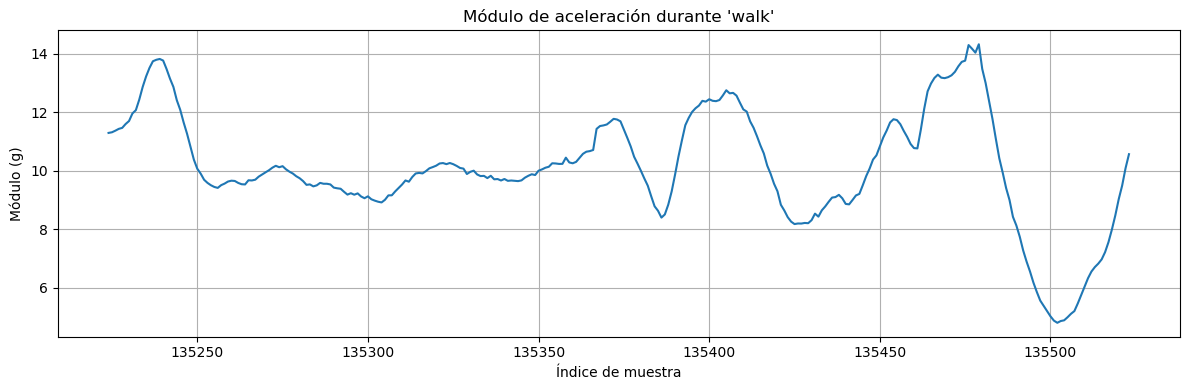

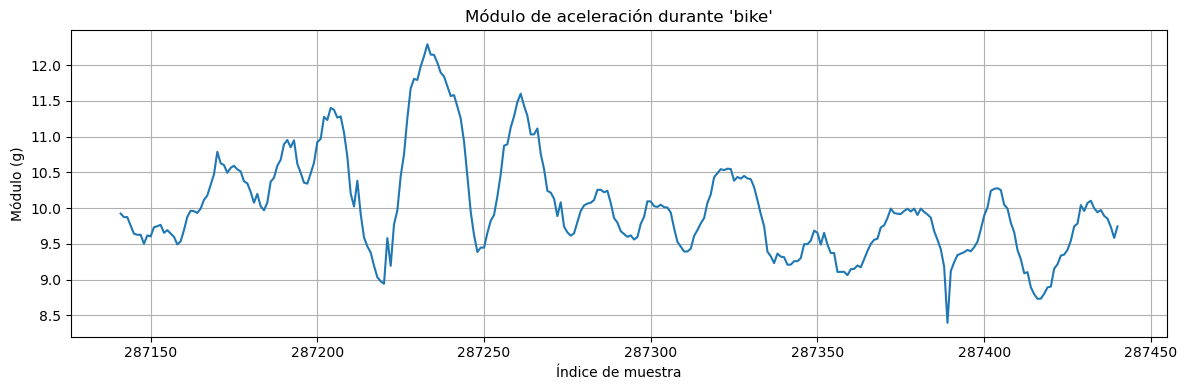

In [8]:
df_subset_ph_acc["mod"] = np.sqrt(
    df_subset_ph_acc["x"] ** 2 + df_subset_ph_acc["y"] ** 2 + df_subset_ph_acc["z"] ** 2
)

for activity in ["walk", "bike"]:
    df_act = df_subset_ph_acc[df_subset_ph_acc["gt"] == activity].head(300)
    plt.figure(figsize=(12, 4))
    plt.plot(df_act.index, df_act["mod"], label="Módulo de aceleración")
    plt.title(f"Módulo de aceleración durante '{activity}'")
    plt.ylabel("Módulo (g)")
    plt.xlabel("Índice de muestra")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Ejercicio 2: Estadísticas básicas de 'x', 'y', 'z'


🔹 **Qué hacer:** 
- Calcular media, desviación estándar, valores máximo y mínimo de las señales del acelerómetro ('x', 'y', 'z').
- Hacer un histograma de cada eje y Boxplots

🔹 **¿Por qué es importante?:** Ver rangos, outliers y planificar normalizaciones.

🔹 **Interpreta los resultados**


In [9]:
df_subset_ph_acc[["x", "y", "z"]].describe()

,x,y,z
count,2.670808e+06,2.670808e+06,2.670808e+06
mean,-1.688456e+00,1.649932e-01,9.344031e+00
std,3.881867e+00,1.478841e+00,2.288068e+00
min,-3.881207e+01,-2.048177e+01,-1.927673e+00
25%,-4.061035e+00,-5.901947e-01,8.125824e+00
50%,-1.952026e+00,1.084442e-01,9.537384e+00
75%,-1.167603e-01,9.844208e-01,1.022888e+01
max,2.555078e+01,2.080815e+01,3.806851e+01


**Interpretación:**
- Se observa que la media de 'z' es mucho mayor que 'x' e 'y', indicando que el movimiento vertical tiene un peso importante.
- Hay mayor dispersión en el eje 'z'.


**Visualización extra:** Histogramas de cada eje y Boxplots.

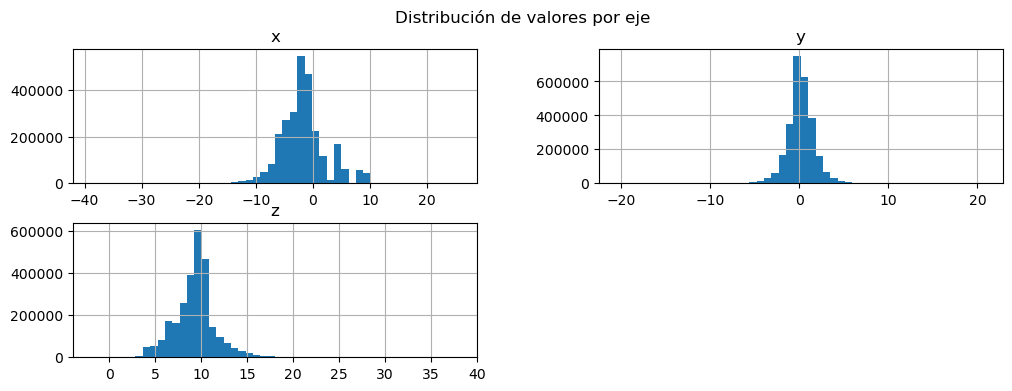

In [10]:
# Histogramas
df_subset_ph_acc[["x", "y", "z"]].hist(figsize=(12, 4), bins=50)
plt.suptitle("Distribución de valores por eje")
plt.show()

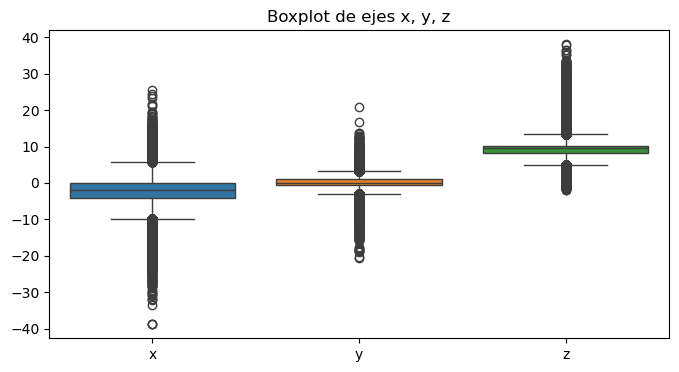

In [11]:
# Boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_subset_ph_acc[["x", "y", "z"]])
plt.title("Boxplot de ejes x, y, z")
plt.show()

**Comentario:**
- Hay outliers visibles especialmente en el eje 'x'.
- Los rangos de 'x', 'y' y 'z' son bastante diferentes, indicando la necesidad de escalar datos si se aplican modelos.

## Ejercicio 3: Filtrar actividades específicas (walk vs sit)

🔹 **Qué hacer:**  
- Filtra el DataFrame `df_subset_ph_acc` para obtener dos nuevos subconjuntos: uno con los registros de la actividad `walk` y otro de `sit`.
- Muestra el número de registros para cada actividad.
- Representa los resultados en un **gráfico de barras** comparando el número de muestras de `walk` vs `sit`.

🔹 **¿Por qué es importante?:**  
- Filtrar datos por condiciones específicas es fundamental para realizar análisis focalizados.
- Visualizar el balance entre clases ayuda a detectar posibles problemas de desbalanceo, muy relevantes para la calidad de los modelos de predicción.

🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?
- ¿Qué problemas podría traer un desbalance muy grande entre clases?
- ¿Cómo podrías corregir un desbalance si fuera necesario?


In [12]:
walk_data = df_subset_ph_acc[df_subset_ph_acc["gt"] == "walk"]
sit_data = df_subset_ph_acc[df_subset_ph_acc["gt"] == "sit"]
print(f"Walk registros: {walk_data.shape[0]}")
print(f"Sit registros: {sit_data.shape[0]}")

Walk registros: 526172
Sit registros: 502487


**Interpretación:**
- Hay más muestras de caminar (`walk`) que de sentarse (`sit`), pero no es una diferencia descomunal.


**Visualización extra:** Comparativa del número de muestras.

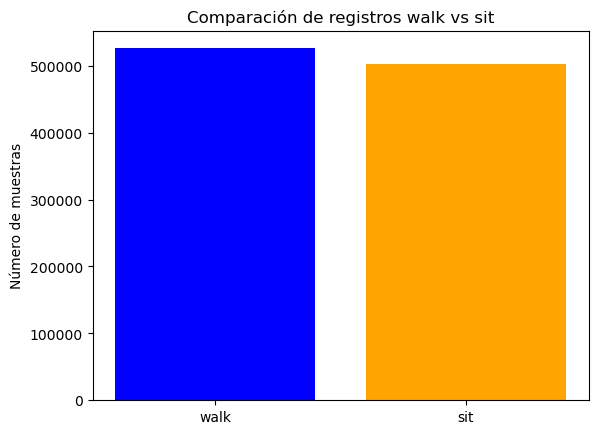

In [13]:
plt.bar(
    ["walk", "sit"], [walk_data.shape[0], sit_data.shape[0]], color=["blue", "orange"]
)
plt.title("Comparación de registros walk vs sit")
plt.ylabel("Número de muestras")
plt.show()

## Interpretación del ejercicio de filtrado de actividades (walk vs sit)

**1. Equilibrio de muestras entre `walk` y `sit`:**
- Si el número de registros de ambas actividades es similar, el dataset está equilibrado.
- Si hay una gran diferencia de registros, existe un desbalance que podría afectar futuros análisis o modelos.

**2. Problemas de un desbalance de clases:**
- Un modelo de predicción puede sesgarse hacia la clase mayoritaria.
- Puede dar la impresión de tener alta precisión simplemente porque predice siempre la clase más frecuente.
- Se reduce la capacidad del modelo para reconocer correctamente la clase minoritaria.

**3. Estrategias para corregir desbalance:**
- **Submuestreo** de la clase mayoritaria.
- **Aumentar** el número de muestras de la clase minoritaria (data augmentation).
- **Asignar pesos** mayores a los errores cometidos sobre la clase minoritaria en el modelo.

**Conclusión:**
Identificar el balance de clases al inicio es clave para definir la estrategia de preparación de los datos y evitar resultados engañosos en etapas posteriores del análisis.


**Comentario:**
- Aunque hay cierto desequilibrio, un modelo podría aprender bien con este reparto.


## Ejercicio 4: Agrupación por actividad y Gráfico comparativo de actividades
🔹 **Qué hacer:** 
- Agrupar por tipo de actividad y calcular medias de `x`, `y`, `z`.
- Hacer un gráfico de barras de medias de `x`, `y`, `z` para 'walk', 'sit' y 'stairsup'.

🔹 **¿Por qué es importante?:** 
- Permite comparar globalmente la dinámica de cada actividad y ver si son fáciles de distinguir.
- Visualizar los patrones ayuda a detectar actividades más fáciles o difíciles de clasificar.

🔹 **Interpretación esperada:** Actividades dinámicas como caminar, correr, subir escaleras deberían tener aceleraciones mayores que sentarse.

🔹 **Preguntas para reflexión:**
- ¿Qué actividades parecen más similares entre sí?
- ¿Qué actividades podrían confundirse en un modelo de clasificación?
- ¿Qué actividad tiene el perfil de aceleración más alto?
- ¿Podríamos usar esta diferencia directamente como una característica para clasificación?




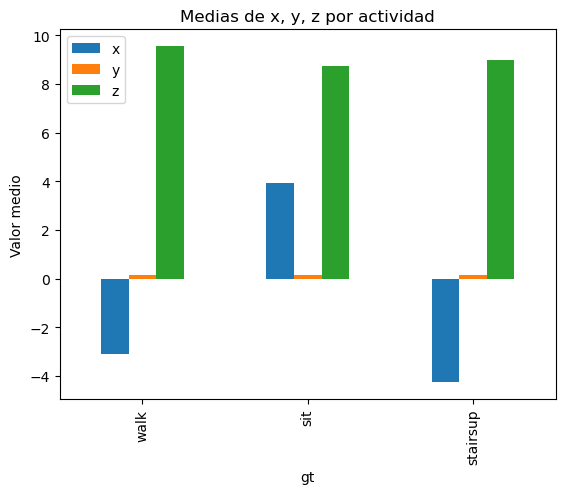

In [14]:
grouped_means = df_subset_ph_acc.groupby("gt")[["x", "y", "z"]].mean()
grouped_means

selected_activities = ["walk", "sit", "stairsup"]
grouped_means.loc[selected_activities].plot(kind="bar")
plt.title("Medias de x, y, z por actividad")
plt.ylabel("Valor medio")
plt.show()

## Ejercicio 5: Clasificación de actividades

🔹 **Qué hacer:**  
- Crea una nueva columna `activity_type` en el DataFrame, clasificando las actividades de la columna `gt` en **"Dinámica"** (`walk`, `stairsup`, `stairsdown`, `run`, `bike`) o **"Estática"** (el resto).  
- Muestra una tabla con las primeras filas (`head()`) mostrando `gt` y `activity_type`.  
- Representa en una **gráfica de barras** la cantidad de muestras de actividades "Dinámica" y "Estática".

🔹 **¿Por qué es importante?:**  
- Saber transformar datos categóricos en grupos más simples es clave para entender mejor los datos y preparar análisis o modelos más robustos.  
- Aprenderás a crear nuevas columnas de forma programada, un paso esencial en cualquier proyecto de análisis de datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pasa si agregamos o quitamos actividades de la clasificación?  
- ¿Crees que esta agrupación podría afectar a un modelo que predice tipos de actividad? ¿Por qué?  
- ¿Qué otras maneras de agrupar actividades se te ocurren?

In [15]:
def classify_activity(activity):
    if activity in ["walk", "stairsup", "stairsdown", "run", "bike"]:
        return "Dinamica"
    else:
        return "Estatica"


df_subset_ph_acc["activity_type"] = df_subset_ph_acc["gt"].apply(classify_activity)
df_subset_ph_acc[["gt", "activity_type"]].head()

,gt,activity_type
0,stand,Estatica
1,stand,Estatica
2,stand,Estatica
3,stand,Estatica
4,stand,Estatica


**Visualización del resultado**

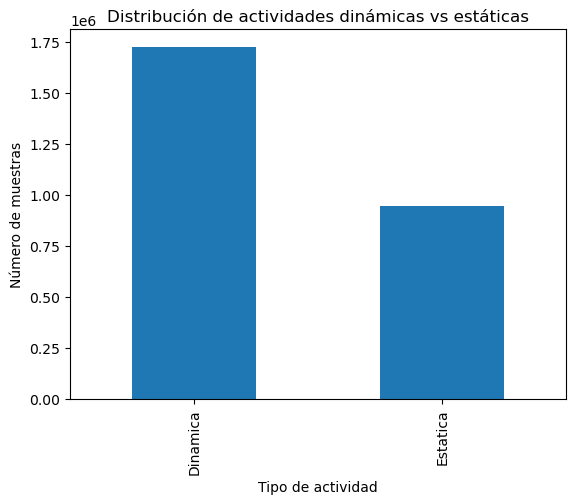

In [16]:
df_subset_ph_acc["activity_type"].value_counts().plot(kind="bar")
plt.title("Distribución de actividades dinámicas vs estáticas")
plt.xlabel("Tipo de actividad")
plt.ylabel("Número de muestras")
plt.show()

## Interpretación del ejercicio de clasificación de actividades

**1. Impacto de modificar la clasificación:**
Modificar qué actividades son consideradas "Dinámicas" o "Estáticas" cambia la distribución de datos. Esto afecta directamente la interpretación estadística de los datos y puede sesgar los resultados si se generan desbalances importantes entre clases.

**2. Efecto en un modelo de predicción:**
Agrupar actividades diferentes bajo una misma categoría implica una pérdida de información. Aunque facilita el análisis reduciendo la complejidad, limita la precisión del modelo si el objetivo es identificar actividades específicas. Esta reducción puede ser adecuada para problemas de clasificación binaria, pero inadecuada para modelos más detallados.

**3. Propuestas alternativas de agrupación:**
- **Por intensidad física:** Permite segmentar actividades en función del esfuerzo requerido, útil en aplicaciones de salud.
- **Por entorno:** Actividades realizadas en interior vs exterior, relevante para aplicaciones de ubicación o contexto.
- **Por desplazamiento:** Diferencia actividades con y sin movimiento espacial, útil en análisis de movilidad.
- **Por impacto médico:** Separar actividades sedentarias de no sedentarias puede ser clave en estudios epidemiológicos.

**Conclusión:**
El modo de agrupar actividades depende del objetivo del análisis. Una clasificación bien pensada puede simplificar los datos sin perder información relevante, pero siempre hay que evaluar los efectos secundarios en la interpretación y en los resultados del análisis o del modelo.


## Ejercicio 6: Comparativa Teléfono vs Reloj (Acelerómetro)

🔹 **Qué hacer:**  
- Filtra el DataFrame para quedarte sólo con las actividades `walk` y `sit`.  
- Crea dos subconjuntos de datos: uno para el teléfono (`ph_acc_common`) y otro para el reloj (`wat_acc_common`).  
- Representa en un **histograma** la distribución de las aceleraciones en el eje **X** para ambos dispositivos, en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Comparar datos de distintos dispositivos para las mismas actividades permite entender mejor las diferencias de captación de los sensores.  
- Aprenderás a utilizar filtros en pandas y a superponer múltiples distribuciones en un solo gráfico para compararlas de manera visual.

🔹 **Preguntas para reflexión:**  
- ¿Observas diferencias claras en las distribuciones de aceleración entre el teléfono y el reloj?  
- ¿Qué factores pueden causar esas diferencias, incluso realizando la misma actividad?  
- ¿Qué implicaciones crees que tendría esta diferencia al entrenar un modelo de predicción?


In [17]:
# Filtro de actividades comunes
activities_of_interest = ["walk", "sit"]
ph_acc_common = df_subset_ph_acc[df_subset_ph_acc["gt"].isin(activities_of_interest)]
wat_acc_common = df_subset_wat_acc[df_subset_wat_acc["gt"].isin(activities_of_interest)]

**Visualización extra:** Histograma comparativo de aceleraciones en 'walk' y 'sit'.

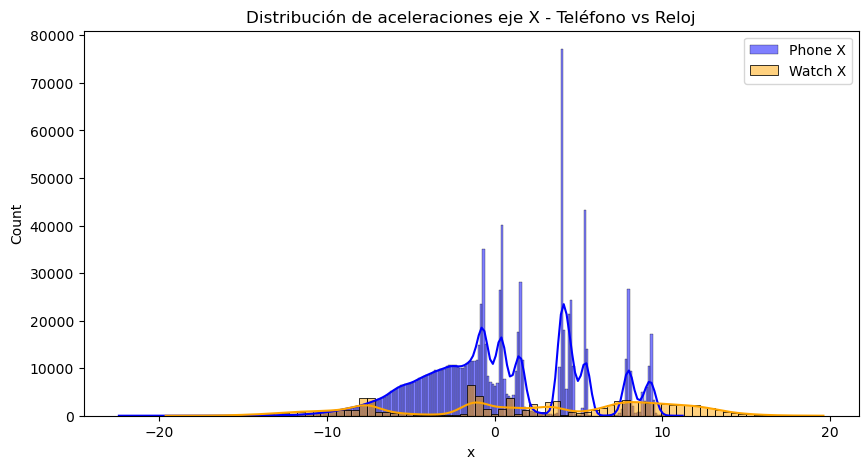

In [18]:
# Histograma de aceleraciones X para teléfono y reloj
plt.figure(figsize=(10, 5))
sns.histplot(ph_acc_common["x"], color="blue", label="Phone X", kde=True)
sns.histplot(wat_acc_common["x"], color="orange", label="Watch X", kde=True)
plt.legend()
plt.title("Distribución de aceleraciones eje X - Teléfono vs Reloj")
plt.show()

## Interpretación del ejercicio de comparación de aceleraciones

**1. Diferencias observadas en las distribuciones:**
Generalmente, se observan diferencias claras entre las aceleraciones registradas por el teléfono y el reloj. Las distribuciones pueden tener distintas anchuras, medias o formas (por ejemplo, el reloj puede registrar movimientos más bruscos o rápidos debido a su posición en la muñeca).

**2. Factores que causan las diferencias:**
- **Ubicación del dispositivo:** El teléfono suele estar en el bolsillo o la mano, mientras que el reloj está fijo en la muñeca.
- **Sensibilidad de los sensores:** Pueden tener distintas características técnicas o resolución.
- **Movimiento natural del cuerpo:** Durante actividades como caminar, el brazo oscila de manera natural, lo que introduce variaciones en el reloj.

**3. Implicaciones en el entrenamiento de modelos:**
- Los modelos deberían ser entrenados considerando el tipo de dispositivo que genera los datos.
- Puede ser necesario normalizar o adaptar los datos según el sensor para evitar introducir sesgos.
- Si se mezclan datos de sensores distintos sin tratamiento previo, el modelo podría aprender patrones erróneos.

**Conclusión:**
Las diferencias entre sensores deben ser gestionadas cuidadosamente en la etapa de preprocesamiento para garantizar que el análisis y los modelos de predicción sean fiables y generalizables.


**Comentario:**
- Las distribuciones pueden mostrar mayor variabilidad en el reloj por movimientos de muñeca.
- El teléfono suele tener señales más estables (por estar en bolsillo o mano fija).

**Interpretación:**
- El **teléfono** muestra una distribución más **concentrada** (picos altos en torno a 5 m/s² y 0 m/s²).
- El **reloj** presenta una **mayor dispersión** (-20 m/s² a 15 m/s²).
- Explicación: el reloj en la muñeca sufre movimientos mucho más bruscos y variados que el teléfono en el bolsillo.

**Conclusión importante:**
> La varianza del reloj es significativamente mayor, complicando la comparación directa para modelos predictivos.

## Ejercicio 7: Comparativa Acelerómetro vs Giroscopio (Teléfono)

🔹 **Qué hacer:**  
- Filtra los datos del giroscopio del teléfono para quedarte solo con las actividades `walk` y `sit`, igual que en el acelerómetro.
- Representa en un **histograma** las distribuciones de aceleraciones en el eje **X** para el acelerómetro (`ph_acc_common`) y para el giroscopio (`ph_gyr_common`), en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Ver qué sensor aporta más información según el tipo de actividad ayuda a optimizar modelos de reconocimiento de actividades.
- Entender qué diferencias existen entre acelerómetro y giroscopio permite seleccionar el sensor adecuado para cada problema.

🔹 **Preguntas para reflexión:**  
- ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?
- ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?
- ¿Podría ser interesante combinar la información de ambos sensores?


In [19]:
# Filtro de actividades comunes también para giroscopio
ph_gyr_common = df_subset_ph_gyr[df_subset_ph_gyr["gt"].isin(activities_of_interest)]
ph_gyr_common

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
55831,55831.0,1.424697e+12,1.424697e+18,-0.138992,-0.254837,0.075958,a,nexus4,nexus4_1,sit
55832,55832.0,1.424697e+12,1.424697e+18,-0.137924,-0.258041,0.083435,a,nexus4,nexus4_1,sit
55833,55833.0,1.424697e+12,1.424697e+18,-0.136856,-0.260178,0.091980,a,nexus4,nexus4_1,sit
55834,55834.0,1.424697e+12,1.424697e+18,-0.140060,-0.260178,0.099457,a,nexus4,nexus4_1,sit
55835,55835.0,1.424697e+12,1.424697e+18,-0.142197,-0.260178,0.104797,a,nexus4,nexus4_1,sit
...,...,...,...,...,...,...,...,...,...,...
12441102,189728.0,1.424777e+12,1.424777e+18,0.129776,-0.160172,-0.121796,i,nexus4,nexus4_1,walk
12441103,189729.0,1.424777e+12,1.424777e+18,0.127640,-0.129196,-0.136749,i,nexus4,nexus4_1,walk
12441104,189730.0,1.424777e+12,1.424777e+18,0.116959,-0.096085,-0.148499,i,nexus4,nexus4_1,walk
12441105,189731.0,1.424777e+12,1.424777e+18,0.111618,-0.064041,-0.165588,i,nexus4,nexus4_1,walk


**Visualización extra:** Histogramas superpuestos de aceleraciones vs velocidades angulares (eje X).

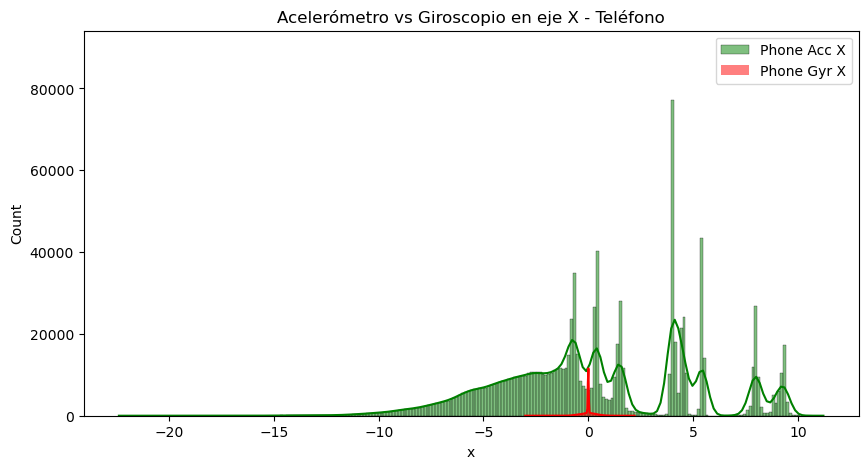

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(ph_acc_common["x"], color="green", label="Phone Acc X", kde=True)
sns.histplot(ph_gyr_common["x"], color="red", label="Phone Gyr X", kde=True)
plt.legend()
plt.title("Acelerómetro vs Giroscopio en eje X - Teléfono")
plt.show()

## Interpretación del ejercicio de comparativa Acelerómetro vs Giroscopio

**1. Diferencias observadas entre acelerómetro y giroscopio:**
- El acelerómetro mide la aceleración lineal, por lo que su distribución refleja cambios de velocidad en línea recta.
- El giroscopio mide la velocidad angular, es decir, los cambios en la orientación del dispositivo.
- En actividades como `walk`, el giroscopio puede mostrar mayor variabilidad debido a la oscilación natural del cuerpo.
- Para actividades como `sit`, ambos sensores muestran menor variabilidad, aunque el acelerómetro puede ser más estable.

**2. Utilidad específica del giroscopio:**
- El giroscopio es especialmente útil en actividades que implican rotación o cambios de dirección, como subir escaleras, correr, o girar.
- Permite detectar pequeños movimientos angulares que un acelerómetro no puede capturar de forma precisa.

**3. Combinación de sensores:**
- Combinar datos de acelerómetro y giroscopio puede mejorar mucho la precisión de un modelo de reconocimiento de actividades.
- Al fusionar ambas fuentes de información, se consigue un perfil de movimiento más completo y robusto.
- Esta combinación se conoce como **fusión de sensores**, técnica común en aplicaciones de inteligencia artificial y dispositivos wearables.

**Conclusión:**
Tanto el acelerómetro como el giroscopio tienen información complementaria. Aprovechar ambos sensores es clave para un análisis más preciso y fiable del movimiento humano.


**Comentario:**
- El acelerómetro mide aceleraciones lineales mientras que el giroscopio mide rotaciones.
- Las escalas son distintas: acelerómetros pueden detectar gravedad (9.8 m/s²), giroscopios detectan velocidad angular (rad/s o deg/s).


**Interpretación:**
- El **acelerómetro** (`Phone Acc X`) muestra picos intensos cerca de 5 m/s² y 0 m/s².
- El **giroscopio** (`Phone Gyr X`) apenas aparece en el histograma, indicando valores más pequeños o menor variabilidad.
- Explicación: el giroscopio mide rotaciones, relevantes en actividades muy dinámicas, no tanto en caminatas o sentarse.

**Conclusión importante:**
> El acelerómetro es más rico para detectar actividades suaves; el giroscopio es útil para movimientos rotacionales más bruscos.


## Ejercicio 8: Correlación entre sensores

🔹 **Qué hacer:**  
- Une los datos del acelerómetro (`ph_acc_common`) y del giroscopio (`ph_gyr_common`) usando solo los ejes `x`, `y`, `z`, ajustando los índices.
- Crea un nuevo DataFrame combinando ambos sensores.
- Calcula y visualiza la **matriz de correlación** entre todas las variables usando un **mapa de calor**.

🔹 **¿Por qué es importante?:**  
- Entender la correlación entre sensores ayuda a detectar si hay redundancia (información duplicada) o complementariedad (información adicional).
- Saber qué variables están correlacionadas permite optimizar modelos, eliminar variables innecesarias o detectar relaciones ocultas en los datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pares de variables presentan mayor correlación?
- ¿Existe más correlación entre ejes del mismo sensor o entre sensores diferentes?
- ¿Cómo podrías usar esta información para mejorar un modelo de predicción?


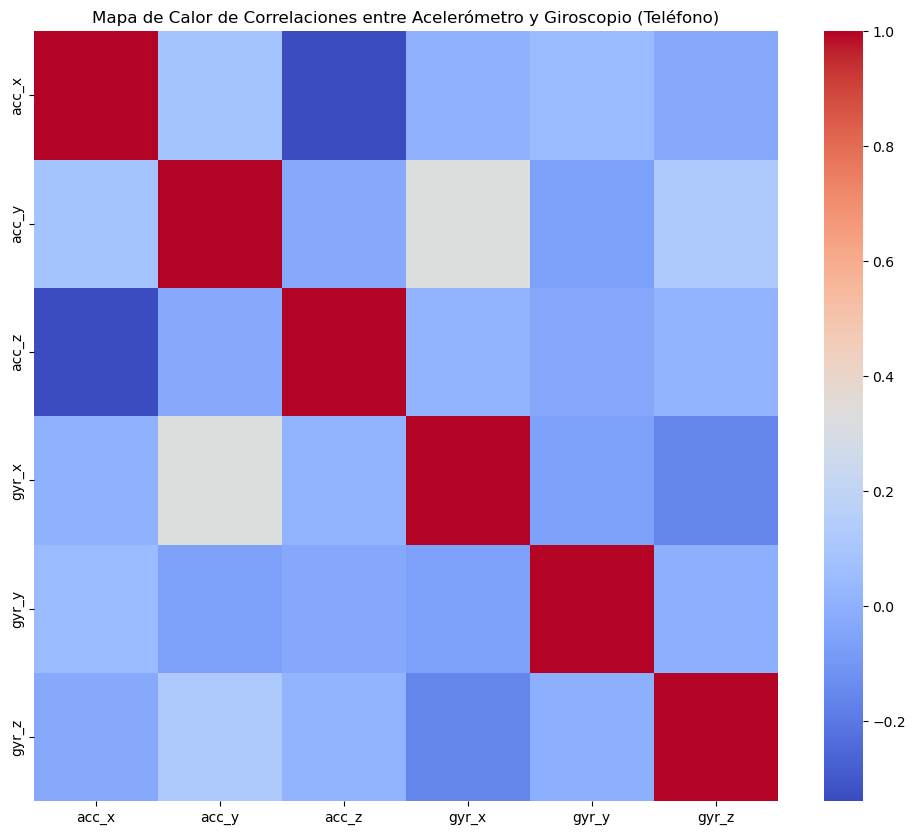

In [21]:
# Unir datasets de ph_acc y ph_gyr para correlación
ph_acc_small = ph_acc_common[["x", "y", "z"]].reset_index(drop=True)
ph_gyr_small = ph_gyr_common[["x", "y", "z"]].reset_index(drop=True)

combined = pd.concat(
    [ph_acc_small.add_prefix("acc_"), ph_gyr_small.add_prefix("gyr_")], axis=1
)

# Matriz de correlación
corr_matrix = combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Mapa de Calor de Correlaciones entre Acelerómetro y Giroscopio (Teléfono)")
plt.show()

## Interpretación del ejercicio de correlación entre sensores

**1. Pares de variables con mayor correlación:**
- Normalmente, encontramos alta correlación entre los ejes del mismo sensor, por ejemplo, `acc_x` y `acc_y` pueden estar moderadamente correlacionados debido a la orientación del dispositivo.
- A veces, también puede existir cierta correlación entre `acc_x` y `gyr_x` si el movimiento lineal y el rotacional coinciden, por ejemplo, al caminar.

**2. Correlación intra-sensor vs inter-sensor:**
- La correlación es generalmente más alta entre los ejes de un mismo sensor.
- Entre sensores diferentes (acelerómetro y giroscopio), la correlación suele ser más baja porque miden fenómenos diferentes (aceleración lineal vs velocidad angular).

**3. Uso de la información de correlación en modelos:**
- Si dos variables están muy correlacionadas, podríamos eliminar una para simplificar el modelo y reducir la multicolinealidad.
- La baja correlación entre sensores distintos sugiere que ambos aportan información complementaria, por lo que conviene utilizarlos juntos para enriquecer el modelo.

**Conclusión:**
El análisis de correlación es una herramienta poderosa para comprender mejor la estructura de los datos y tomar decisiones fundamentadas en la selección de variables para análisis más eficientes y efectivos.


**Comentario:**
- Correlaciones altas entre ejes `acc_x` y `gyr_x` podrían indicar redundancia de información.
- Correlaciones bajas sugieren que ambos sensores aportan información complementaria.


**Interpretación:**
- Correlaciones bajas entre acelerómetro y giroscopio.
- Ligera correlación interna entre ejes de un mismo sensor.
- Indica que ambos sensores capturan información **complementaria**.

**Conclusión importante:**
> Combinar acelerómetro y giroscopio en modelos puede mejorar el rendimiento por la diversidad de información.

**Resumen de la comparativa realizada**

- **Datos de reloj** son más ruidosos ➔ mayor dispersión ➔ mayor reto para modelos.
- **Acelerómetro** es crítico para actividades suaves.
- **Giroscopio** complementa bien en actividades dinámicas.
- **Combinar acelerómetro y giroscopio** podría mejorar la precisión del modelo.

# Flexible Classification Framework

This framework provides a comprehensive and flexible solution for training classification models on the HAR (Human Activity Recognition) dataset.

## Features

### 1. **Configurable Features (X)**
Select any combination of numeric columns as input features:
- `['x', 'y', 'z']` - Accelerometer axes
- `['x', 'y', 'z', 'mod']` - Including magnitude
- `['x', 'y']` - Subset of features
- Any other numeric columns from the dataset

### 2. **Configurable Target (y)**
Choose from categorical columns for classification:
- **Binary Classification**: `'activity_type'` (Dinámica/Estática)
- **Multi-class Classification**: `'gt'` (walk, sit, stand, stairsup, stairsdown, bike, etc.)

### 3. **Multiple Classification Models**
Switch between different algorithms:
- **`'logistic'`** - Logistic Regression (linear, fast, interpretable)
- **`'random_forest'`** - Random Forest (ensemble, robust, feature importance)
- **`'decision_tree'`** - Decision Tree (interpretable, fast)
- **`'knn'`** - K-Nearest Neighbors (instance-based, no training)
- **`'svm'`** - Support Vector Machine (good for non-linear boundaries)

## Usage

Simply modify the three configuration variables at the top of the code cell:

```python
FEATURES = ['x', 'y', 'z']      # Select features
TARGET = 'activity_type'        # Select target variable
MODEL_TYPE = 'logistic'        # Select model type
```

## Output

The framework automatically provides:
- ✅ Data validation and summary statistics
- ✅ Training and test accuracy metrics
- ✅ Detailed classification report (precision, recall, F1-score)
- ✅ Confusion matrix (text and visualization)
- ✅ Feature importance/coefficients analysis
- ✅ Training time measurement
- ✅ Automatic handling of binary vs. multi-class classification

## Examples

**Example 1: Binary classification with Logistic Regression**
```python
FEATURES = ['x', 'y', 'z']
TARGET = 'activity_type'
MODEL_TYPE = 'logistic'
```

**Example 2: Multi-class classification with Random Forest**
```python
FEATURES = ['x', 'y', 'z', 'mod']
TARGET = 'gt'
MODEL_TYPE = 'random_forest'
```

Available numeric columns for features: ['Index', 'Arrival_Time', 'Creation_Time', 'x', 'y', 'z', 'mod']
Available categorical columns for target: ['User', 'Model', 'Device', 'gt', 'activity_type']


Data Summary:
  Features (X): ['x', 'y', 'z', 'mod']
  Target (y): gt
  Shape of X: (26709, 4)
  Shape of y: (26709,)
  Missing values in X: 0

Target distribution (gt):
(array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object), array([3992, 5026, 3788, 4201, 4441, 5261]))

Number of classes: 6

Training SVM classifier...
Training time: 9.32 seconds
Prediction time: 13.70 seconds

MODEL PERFORMANCE

Model: SVM
Features: ['x', 'y', 'z', 'mod']
Target: gt

Training Accuracy: 0.5655
Test Accuracy: 0.5582

----------------------------------------------------------------------
Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

        bike       0.44      0.33      0.38

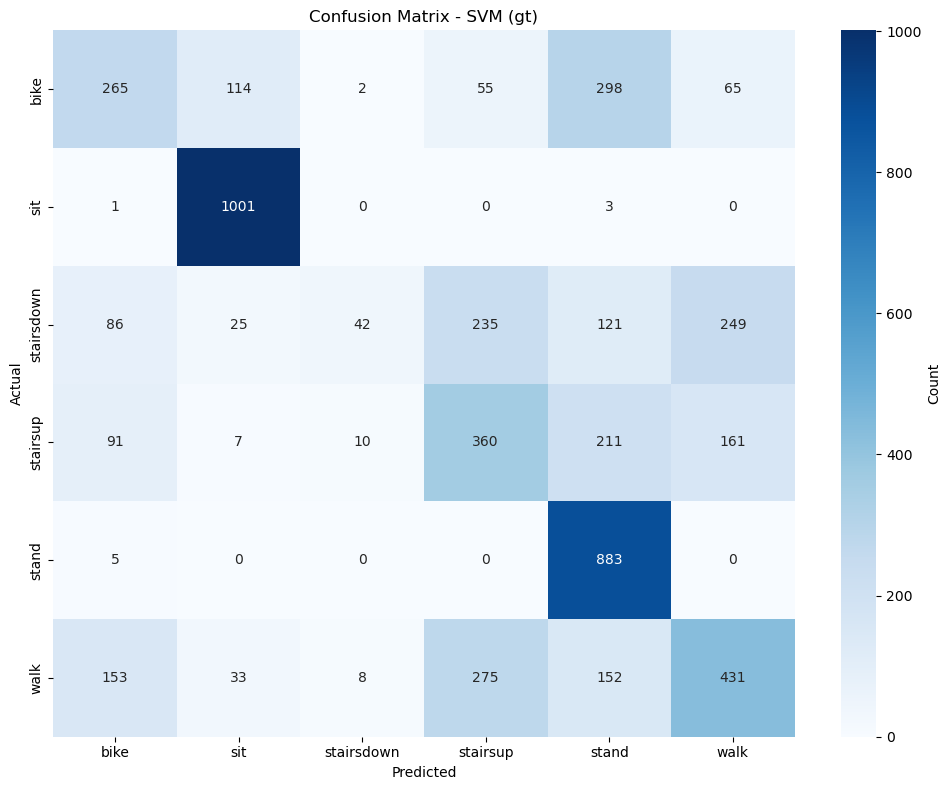


To try different configurations, modify the variables at the top:
  - FEATURES: Change the list of features to use
  - TARGET: Change the target variable (e.g., 'gt' for multi-class)
  - MODEL_TYPE: Change the model (e.g., 'random_forest', 'knn', etc.)


In [30]:
# ============================================================================
# FLEXIBLE CLASSIFICATION FRAMEWORK
# ============================================================================
# This framework allows you to:
# 1. Select different features (X) from numeric columns
# 2. Select different target variables (y) - supports binary and multi-class
# 3. Try different classification models
# ============================================================================

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ============================================================================
# CONFIGURATION: Change these variables to experiment
# ============================================================================

# Select features (X) - choose from numeric columns: ['x', 'y', 'z', 'mod']
FEATURES = ["x", "y", "z", "mod"]  # Change this list to try different features

# Select target (y) - choose from categorical columns: ['activity_type', 'gt']
TARGET = (
    "gt"  # Change to 'gt' for multi-class classification, or 'activity_type' for binary
)

# Select model - options: 'logistic', 'random_forest', 'decision_tree', 'knn'
MODEL_TYPE = "svm"  # Change this to try different models

# ============================================================================
# DATA PREPARATION
# ============================================================================

# Get numeric columns for features
numeric_cols = df_subset_ph_acc.select_dtypes(include=[np.number]).columns.tolist()
print("Available numeric columns for features:", numeric_cols)

# Get categorical columns for target
categorical_cols = df_subset_ph_acc.select_dtypes(include=["object"]).columns.tolist()
print("Available categorical columns for target:", categorical_cols)
print("\n" + "=" * 70)

# Validate feature selection
invalid_features = [f for f in FEATURES if f not in numeric_cols]
if invalid_features:
    raise ValueError(
        f"Invalid features selected: {invalid_features}. Available: {numeric_cols}"
    )

# Validate target selection
if TARGET not in categorical_cols:
    raise ValueError(
        f"Invalid target selected: {TARGET}. Available: {categorical_cols}"
    )

# Prepare the data
X = df_subset_ph_acc.loc[::100, FEATURES].values
y = df_subset_ph_acc.loc[::100, TARGET].values

# Check for missing values
print("\nData Summary:")
print(f"  Features (X): {FEATURES}")
print(f"  Target (y): {TARGET}")
print(f"  Shape of X: {X.shape}")
print(f"  Shape of y: {y.shape}")
print(f"  Missing values in X: {np.isnan(X).sum()}")

# Show target distribution
print(f"\nTarget distribution ({TARGET}):")
target_counts = np.unique(y, return_counts=True)
print(target_counts)
print(f"\nNumber of classes: {len(target_counts[0])}")
print("=" * 70 + "\n")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================================
# MODEL SELECTION AND TRAINING
# ============================================================================

models = {
    "logistic": LogisticRegression(random_state=42, max_iter=1000),
    "random_forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "knn": KNeighborsClassifier(n_neighbors=5),
    "svm": SVC(random_state=42),
}

if MODEL_TYPE not in models:
    raise ValueError(
        f"Invalid model type: {MODEL_TYPE}. Available: {list(models.keys())}"
    )

print(f"Training {MODEL_TYPE.upper().replace('_', ' ')} classifier...")
classifier = models[MODEL_TYPE]
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions
start_time = time.time()
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

# ============================================================================
# MODEL EVALUATION
# ============================================================================

print("\n" + "=" * 70)
print("MODEL PERFORMANCE")
print("=" * 70)
print(f"\nModel: {MODEL_TYPE.upper().replace('_', ' ')}")
print(f"Features: {FEATURES}")
print(f"Target: {TARGET}")
print(f"\nTraining Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Get class names for reporting
class_names = sorted(df_subset_ph_acc[TARGET].unique())

print("\n" + "-" * 70)
print("Classification Report:")
print("-" * 70)
print(classification_report(y_test, y_pred, target_names=class_names))

print("\n" + "-" * 70)
print("Confusion Matrix:")
print("-" * 70)
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix in a readable format
print(f"\n{'Predicted':>20}", end="")
for name in class_names:
    print(f"{name:>15}", end="")
print()
for i, name in enumerate(class_names):
    print(f"{'Actual ' + name:>20}", end="")
    for j in range(len(class_names)):
        print(f"{cm[i, j]:>15}", end="")
    print()

# ============================================================================
# FEATURE IMPORTANCE / COEFFICIENTS
# ============================================================================

print("\n" + "-" * 70)
if hasattr(classifier, "coef_"):
    print("Feature Coefficients (Logistic Regression):")
    print("-" * 70)
    for i, feature in enumerate(FEATURES):
        if len(classifier.coef_) == 1:  # Binary classification
            print(f"{feature:>15}: {classifier.coef_[0][i]:.4f}")
        else:  # Multi-class
            for j, class_name in enumerate(class_names):
                print(
                    f"{feature:>15} (class {class_name}): {classifier.coef_[j][i]:.4f}"
                )
    if hasattr(classifier, "intercept_"):
        if len(classifier.intercept_) == 1:
            print(f"{'Intercept':>15}: {classifier.intercept_[0]:.4f}")
        else:
            for j, class_name in enumerate(class_names):
                print(
                    f"{'Intercept (' + class_name + ')':>15}: {classifier.intercept_[j]:.4f}"
                )

elif hasattr(classifier, "feature_importances_"):
    print("Feature Importances (Tree-based models):")
    print("-" * 70)
    for i, feature in enumerate(FEATURES):
        print(f"{feature:>15}: {classifier.feature_importances_[i]:.4f}")

# ============================================================================
# VISUALIZATION
# ============================================================================

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={"label": "Count"},
)
plt.title(f"Confusion Matrix - {MODEL_TYPE.upper().replace('_', ' ')} ({TARGET})")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("To try different configurations, modify the variables at the top:")
print("  - FEATURES: Change the list of features to use")
print("  - TARGET: Change the target variable (e.g., 'gt' for multi-class)")
print("  - MODEL_TYPE: Change the model (e.g., 'random_forest', 'knn', etc.)")
print("=" * 70)